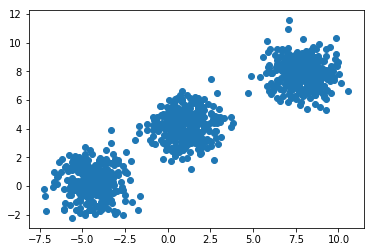

In [36]:
from sklearn import datasets
import matplotlib.pyplot as plt

blobs = datasets.make_blobs(n_samples=1000, random_state=3)

plt.scatter(blobs[0][:,0], blobs[0][:,1])
plt.show()

In [35]:
data ={0:[51.5217, 30.114, 0], 1:[27.9698, 27.0568, 1], 2:[10.6233, 52.4207, 2], 3:[122.1483, 6.9586, 3], 4:[146.4236, -41.3457, 4]}
k = 2
m = 0
n = 5

In [37]:
data = dict()
for idx, items in enumerate(blobs[0]):
    data.update({idx: list(items)+[idx]})
n = len(blobs[0])
k = 3
m = 0

In [38]:
%%prun
def distance(x,y, m):
    dist = [(x[idx]-y[idx])**2 for idx in range(len(x)-1)]
    return sum(dist)**(1/2)

def cluster_dist(item1, item2, m):
    dist_list = [dist_mat[element1][element2] if element1 < element2 else dist_mat[element2][element1]
                 for element1 in item1 for element2 in item2]
    if dist_list:
        if m==0:
            temp = min(dist_list)
        elif m==1:
            temp = max(dist_list)
        else:
            temp = sum(dist_list)/len(dist_list)
        return temp

# calculate distance matrix
keys= data.keys()
keys = list(data.keys())
dist_mat = [[float('inf') for key1 in keys] for key2 in keys]
for i in keys:
    for j in keys[i+1:]:
        dist_mat[i][j] = distance(data.get(i), data.get(j), m)

# make cluster dictionary
cluster_dict = dict()
[cluster_dict.update({key:[key]}) for key in data.keys()]

# Repeat merging until getting k clusters
while n>k:
    # calculate distance between clusters
    sorted_keys = sorted(list(cluster_dict.keys()))
    dist_list = [ (key1, key2, cluster_dist(cluster_dict.get(key1),cluster_dict.get(key2),m))
                 for idx1, key1 in enumerate(sorted_keys)
                 for key2 in sorted_keys[idx1+1:]]
    i, j, _ = min(dist_list, key= lambda t: t[2])

    # get new cluster and remove previous ones
    new_cluster = cluster_dict.get(i)+cluster_dict.get(j)
    temp = cluster_dict.pop(i)
    temp = cluster_dict.pop(j)
    cluster_dict.update({i:new_cluster})

    # update cluster list
    new_cluster_dict = dict()
    idx = 0
    for key, item in cluster_dict.items():
        new_cluster_dict.update({idx:item})
        idx +=1
    cluster_dict = new_cluster_dict
    n = len(cluster_dict)

# print out results after transforming to list
result_list = [[key, element] for key, item in cluster_dict.items() for element in item]
arg_sort_idx = sorted(range(len(result_list)), key=list(zip(*result_list))[1].__getitem__)
clusters = list(zip(*result_list))[0]

# for idx in arg_sort_idx:
#     print(clusters[idx])

In [20]:
import pandas as pd
pd.DataFrame(dist_mat)

,0,1,2,3,4
0,inf,23.749494,46.586135,74.325562,118.797556
1,23.749494,inf,30.728301,96.299156,136.785250
2,46.586135,30.728301,inf,120.435162,165.026844
3,74.325562,96.299156,120.435162,inf,54.061036
4,118.797556,136.785250,165.026844,54.061036,inf
